<a href="https://colab.research.google.com/github/prabindh/covid2020-predictor/blob/master/Prediction_Covid_Exercise.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Prediction Exercise

Predict the number of cases n-days after from the 1st reported infection.

Use the data available in the below file, provided by JHU CSSE.

https://github.com/prabindh/COVID-19/blob/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv

In [1]:
import pandas as pd

from urllib.request import urlopen
#numbers_csv = urlopen("https://raw.githubusercontent.com/prabindh/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv")
numbers_csv = urlopen("https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv")
numbers_df = pd.read_csv(numbers_csv)
numbers_df.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,...,3/1/20,3/2/20,3/3/20,3/4/20,3/5/20,3/6/20,3/7/20,3/8/20,3/9/20,3/10/20,3/11/20,3/12/20,3/13/20,3/14/20,3/15/20,3/16/20,3/17/20,3/18/20,3/19/20,3/20/20,3/21/20,3/22/20,3/23/20,3/24/20,3/25/20,3/26/20,3/27/20,3/28/20,3/29/20,3/30/20,3/31/20,4/1/20,4/2/20,4/3/20,4/4/20,4/5/20,4/6/20,4/7/20,4/8/20,4/9/20
0,NaN,Afghanistan,33.0000,65.0000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,...,1,1,1,1,1,1,1,4,4,5,7,7,7,11,16,21,22,22,22,24,24,40,40,74,84,94,110,110,120,170,174,237,273,281,299,349,367,423,444,484
1,NaN,Albania,41.1533,20.1683,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,2,10,12,23,33,38,42,51,55,59,64,70,76,89,104,123,146,174,186,197,212,223,243,259,277,304,333,361,377,383,400,409
2,NaN,Algeria,28.0339,1.6596,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,...,1,3,5,12,12,17,17,19,20,20,20,24,26,37,48,54,60,74,87,90,139,201,230,264,302,367,409,454,511,584,716,847,986,1171,1251,1320,1423,1468,1572,1666
3,NaN,Andorra,42.5063,1.5218,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,2,39,39,53,75,88,113,133,164,188,224,267,308,334,370,376,390,428,439,466,501,525,545,564,583
4,NaN,Angola,-11.2027,17.8739,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,2,2,3,3,3,4,4,5,7,7,7,8,8,8,10,14,16,17,19,19


Lets find the details of this dataset.


In [2]:
numbers_df["Country/Region"].describe()

count       263
unique      184
top       China
freq         33
Name: Country/Region, dtype: object

Treating the various provinces, countries as independent features, get only the numeric count for all rows.

In [3]:
count_df = numbers_df.iloc[:, 4:]
count_df.head()

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,2/27/20,2/28/20,2/29/20,3/1/20,3/2/20,3/3/20,3/4/20,3/5/20,3/6/20,3/7/20,3/8/20,3/9/20,3/10/20,3/11/20,3/12/20,3/13/20,3/14/20,3/15/20,3/16/20,3/17/20,3/18/20,3/19/20,3/20/20,3/21/20,3/22/20,3/23/20,3/24/20,3/25/20,3/26/20,3/27/20,3/28/20,3/29/20,3/30/20,3/31/20,4/1/20,4/2/20,4/3/20,4/4/20,4/5/20,4/6/20,4/7/20,4/8/20,4/9/20
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,4,4,5,7,7,7,11,16,21,22,22,22,24,24,40,40,74,84,94,110,110,120,170,174,237,273,281,299,349,367,423,444,484
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,10,12,23,33,38,42,51,55,59,64,70,76,89,104,123,146,174,186,197,212,223,243,259,277,304,333,361,377,383,400,409
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,3,5,12,12,17,17,19,20,20,20,24,26,37,48,54,60,74,87,90,139,201,230,264,302,367,409,454,511,584,716,847,986,1171,1251,1320,1423,1468,1572,1666
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,2,39,39,53,75,88,113,133,164,188,224,267,308,334,370,376,390,428,439,466,501,525,545,564,583
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,2,2,3,3,3,4,4,5,7,7,7,8,8,8,10,14,16,17,19,19


In [4]:
count_df.describe()

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,2/27/20,2/28/20,2/29/20,3/1/20,3/2/20,3/3/20,3/4/20,3/5/20,3/6/20,3/7/20,3/8/20,3/9/20,3/10/20,3/11/20,3/12/20,3/13/20,3/14/20,3/15/20,3/16/20,3/17/20,3/18/20,3/19/20,3/20/20,3/21/20,3/22/20,3/23/20,3/24/20,3/25/20,3/26/20,3/27/20,3/28/20,3/29/20,3/30/20,3/31/20,4/1/20,4/2/20,4/3/20,4/4/20,4/5/20,4/6/20,4/7/20,4/8/20,4/9/20
count,263.000000,263.000000,263.000000,263.000000,263.000000,263.000000,263.000000,263.000000,263.000000,263.000000,263.000000,263.000000,263.000000,263.000000,263.000000,263.000000,263.000000,263.000000,263.000000,263.000000,263.000000,263.000000,263.000000,263.000000,263.000000,263.000000,263.000000,263.000000,263.000000,263.000000,263.000000,263.000000,263.000000,263.000000,263.000000,263.000000,263.000000,263.00000,263.000000,263.000000,263.000000,263.000000,263.000000,263.000000,263.000000,263.000000,263.000000,263.000000,263.000000,263.000000,263.000000,263.000000,263.000000,263.000000,263.000000,263.000000,263.000000,263.000000,263.000000,263.000000,263.000000,263.000000,263.000000,263.000000,263.000000,263.000000,263.000000,263.000000,263.000000,263.000000,263.000000,263.000000,263.000000,263.000000,263.000000,263.000000,263.000000,263.000000,263.000000
mean,2.110266,2.486692,3.577947,5.452471,8.053232,11.129278,21.209125,23.444867,31.307985,37.745247,45.771863,63.828897,75.593156,90.844106,105.076046,117.087452,130.764259,141.140684,152.661597,162.593156,170.349810,171.942966,229.536122,254.315589,262.471483,270.813688,278.547529,285.688213,287.600760,289.722433,292.087452,298.752852,300.220532,302.513308,305.726236,309.460076,314.623574,319.81749,327.038023,336.003802,343.368821,353.003802,361.673004,372.190114,387.076046,402.460076,417.570342,431.901141,451.026616,478.612167,488.030418,552.110266,593.539924,636.707224,690.395437,749.437262,816.809886,922.319392,1035.011407,1157.821293,1281.190114,1438.155894,1589.524715,1778.148289,2013.653992,2255.859316,2512.140684,2738.174905,2974.863118,3260.406844,3546.026616,3853.482890,4166.984791,4552.882129,4836.939163,5114.452471,5422.418251,5745.642586,6065.969582
std,27.434015,27.532888,34.275498,47.702207,66.662110,89.815834,220.427512,221.769901,305.614661,362.331930,445.871350,692.935941,837.671954,1032.399526,1216.612056,1367.637255,1542.819479,1675.277447,1831.231877,1960.457216,2061.434174,2061.774351,2974.824847,3356.660093,3470.253449,3589.366019,3700.701127,3805.013537,3826.544025,3851.851318,3865.477908,3953.053686,3953.090332,3965.659821,3996.448782,4021.344113,4047.111642,4067.69811,4095.698892,4133.112925,4148.054007,4160.475971,4171.952587,4186.101105,4203.394057,4220.800907,4237.285207,4256.803896,4272.911234,4306.276373,4316.574662,4410.225194,4492.263156,4587.887549,4701.995471,4837.799546,5019.924880,5312.704900,5668.932552,6098.866935,6536.774297,7145.980590,7762.409314,8586.491232,9701.702166,10865.641188,12146.505253,13348.022358,14659.091194,16274.718201,17892.269613,19747.178551,21707.026686,23984.073766,25717.561274,27517.452168,29418.401918,31466.358777,33481.088534
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0

Get the country with maximum numbers the last day of record.


In [5]:
max_count = count_df.iloc[:, -1].max()
max_count

461437

In [6]:
max_index = count_df['4/2/20'].idxmax()
max_index

225

In [7]:
numbers_df.iloc[max_index]

Province/State        NaN
Country/Region         US
Lat               37.0902
Long             -95.7129
1/22/20                 1
                   ...   
4/5/20             337072
4/6/20             366667
4/7/20             396223
4/8/20             429052
4/9/20             461437
Name: 225, Length: 83, dtype: object

In [8]:
usa_data = numbers_df[numbers_df["Country/Region"] == "US"]
usa_data

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,...,3/1/20,3/2/20,3/3/20,3/4/20,3/5/20,3/6/20,3/7/20,3/8/20,3/9/20,3/10/20,3/11/20,3/12/20,3/13/20,3/14/20,3/15/20,3/16/20,3/17/20,3/18/20,3/19/20,3/20/20,3/21/20,3/22/20,3/23/20,3/24/20,3/25/20,3/26/20,3/27/20,3/28/20,3/29/20,3/30/20,3/31/20,4/1/20,4/2/20,4/3/20,4/4/20,4/5/20,4/6/20,4/7/20,4/8/20,4/9/20
225,NaN,US,37.0902,-95.7129,1,1,2,2,5,5,5,5,5,7,8,8,11,11,11,11,11,11,11,11,12,12,13,13,13,13,13,13,13,13,15,15,15,51,51,57,...,74,98,118,149,217,262,402,518,583,959,1281,1663,2179,2727,3499,4632,6421,7783,13747,19273,25600,33276,43847,53740,65778,83836,101657,121465,140909,161831,188172,213372,243762,275586,308853,337072,366667,396223,429052,461437


In [9]:
china_data = numbers_df[numbers_df["Country/Region"] == "China"]
china_data

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,...,3/1/20,3/2/20,3/3/20,3/4/20,3/5/20,3/6/20,3/7/20,3/8/20,3/9/20,3/10/20,3/11/20,3/12/20,3/13/20,3/14/20,3/15/20,3/16/20,3/17/20,3/18/20,3/19/20,3/20/20,3/21/20,3/22/20,3/23/20,3/24/20,3/25/20,3/26/20,3/27/20,3/28/20,3/29/20,3/30/20,3/31/20,4/1/20,4/2/20,4/3/20,4/4/20,4/5/20,4/6/20,4/7/20,4/8/20,4/9/20
49,Anhui,China,31.8257,117.2264,1,9,15,39,60,70,106,152,200,237,297,340,408,480,530,591,665,733,779,830,860,889,910,934,950,962,973,982,986,987,988,989,989,989,989,989,...,990,990,990,990,990,990,990,990,990,990,990,990,990,990,990,990,990,990,990,990,990,990,990,990,990,990,990,990,990,990,990,990,990,990,990,990,990,990,990,991
50,Beijing,China,40.1824,116.4142,14,22,36,41,68,80,91,111,114,139,168,191,212,228,253,274,297,315,326,337,342,352,366,372,375,380,381,387,393,395,396,399,399,399,400,400,...,413,414,414,418,418,422,426,428,428,429,435,435,436,437,442,452,456,469,480,491,504,522,537,558,561,566,569,573,577,577,580,580,582,584,585,586,587,587,588,588
51,Chongqing,China,30.0572,107.8740,6,9,27,57,75,110,132,147,182,211,247,300,337,366,389,411,426,428,468,486,505,518,529,537,544,551,553,555,560,567,572,573,575,576,576,576,...,576,576,576,576,576,576,576,576,576,576,576,576,576,576,576,576,576,576,576,576,576,577,578,578,578,578,578,578,579,579,579,579,579,579,579,579,579,579,579,579
52,Fujian,China,26.0789,117.9874,1,5,10,18,35,59,80,84,101,120,144,159,179,194,205,215,224,239,250,261,267,272,279,281,285,287,290,292,293,293,293,293,293,293,294,294,...,296,296,296,296,296,296,296,296,296,296,296,296,296,296,296,296,296,296,296,299,303,313,313,318,322,328,331,337,338,340,343,345,345,349,350,350,350,351,351,351
53,Gansu,China,37.8099,101.0583,0,2,2,4,7,14,19,24,26,29,40,51,55,57,62,62,67,79,83,83,86,87,90,90,90,90,91,91,91,91,91,91,91,91,91,91,...,91,91,91,91,102,119,120,124,124,125,127,127,127,129,133,133,133,133,134,134,134,136,136,136,136,136,136,136,138,138,138,138,138,138,138,138,139,139,139,139
54,Guangdong,China,23.3417,113.4244,26,32,53,78,111,151,207,277,354,436,535,632,725,813,895,970,1034,1095,1131,1159,1177,1219,1241,1261,1294,1316,1322,1328,1331,1332,1333,1339,1342,1345,1347,1347,...,1349,1350,1350,1350,1351,1352,1352,1352,1352,1353,1356,1356,1356,1356,1360,1361,1364,1370,1378,1395,1400,1413,1415,1428,1433,1448,1456,1467,1475,1484,1494,1501,1507,1514,1516,1524,1532,1533,1536,1539
55,Guangxi,China,23.8298,108.7881,2,5,23,23,36,46,51,58,78,87,100,111,127,139,150,168,172,183,195,210,215,222,222,226,235,237,238,242,244,245,246,249,249,251,252,252,...,252,252,252,252,252,252,252,252,252,252,252,252,252,252,252,252,253,253,253,254,254,254,254,254,254,254,254,254,254,254,254,254,254,254,254,254,254,254,254,254
56,Guizhou,China,26.8154,106.8748,1,3,3,4,5,7,9,9,12,29,29,38,46,58,64,71,81,89,99,109,127,133,135,140,143,144,146,146,146,146,146,146,146,146,146,146,...,146,146,146,146,146,146,146,146,146,146,146,146,146,146,146,146,147,146,146,146,146,146,146,146,146,146,146,146,146,146,146,146,146,146,146,146,146,146,146,146
57,Hainan,China,19.1959,109.7453,4,5,8,19,22,33,40,43,46,52,62,64,72,80,99,106,117,124,131,138,144,157,157,159,162,162,163,163,168,168,168,168,168,168,168,168,...,168,168,168,168,168,168,168,168,168,168,168,168,168,168,168,168,168,168,168,168,168,168,168,168,168,168,168,168,168,168,168,168,168,168,168,168,168,168,168,168
58,Hebei,China,39.5490,116.1306,1,1,2,8,13,18,33,48,65,82,96,104,113,126,135,157,172,195,206,218,239,251,265,283,291,300,301,306,306,307,308,309,311,311,311,312,...,318,318,318,318,318,318,318,318,318,318,318,318,318,318,318,318,318,318,318,318,318,319,319,319,319,319,319,319,319,321,321,323,325,326,326,327,327,327,327,327


How does India fare ?

In [10]:
india_data = numbers_df[numbers_df["Country/Region"] == "India"]
india_data

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,...,3/1/20,3/2/20,3/3/20,3/4/20,3/5/20,3/6/20,3/7/20,3/8/20,3/9/20,3/10/20,3/11/20,3/12/20,3/13/20,3/14/20,3/15/20,3/16/20,3/17/20,3/18/20,3/19/20,3/20/20,3/21/20,3/22/20,3/23/20,3/24/20,3/25/20,3/26/20,3/27/20,3/28/20,3/29/20,3/30/20,3/31/20,4/1/20,4/2/20,4/3/20,4/4/20,4/5/20,4/6/20,4/7/20,4/8/20,4/9/20
131,NaN,India,21.0,78.0,0,0,0,0,0,0,0,0,1,1,1,2,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,...,3,5,5,28,30,31,34,39,43,56,62,73,82,102,113,119,142,156,194,244,330,396,499,536,657,727,887,987,1024,1251,1397,1998,2543,2567,3082,3588,4778,5311,5916,6725


## Visualisation of the rates

In [11]:
# Take only the numerical values
counts = india_data.iloc[0:1, range(4, len(india_data.columns))]

startCol = 0
for columnName in counts:
  if counts[columnName].values > 0:
    break
  startCol = startCol + 1
counts = counts.iloc[0:1, range(startCol, len(counts.columns))]

counts

,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,2/27/20,2/28/20,2/29/20,3/1/20,3/2/20,3/3/20,3/4/20,3/5/20,3/6/20,3/7/20,3/8/20,3/9/20,3/10/20,3/11/20,3/12/20,3/13/20,3/14/20,3/15/20,3/16/20,3/17/20,3/18/20,3/19/20,3/20/20,3/21/20,3/22/20,3/23/20,3/24/20,3/25/20,3/26/20,3/27/20,3/28/20,3/29/20,3/30/20,3/31/20,4/1/20,4/2/20,4/3/20,4/4/20,4/5/20,4/6/20,4/7/20,4/8/20,4/9/20
131,1,1,1,2,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,5,5,28,30,31,34,39,43,56,62,73,82,102,113,119,142,156,194,244,330,396,499,536,657,727,887,987,1024,1251,1397,1998,2543,2567,3082,3588,4778,5311,5916,6725


## Converting to np array

In [0]:
counts_np = counts.to_numpy()

In [13]:
counts_np.shape

(1, 71)

In [0]:
import numpy as np
counts_np = np.squeeze(counts_np)

In [15]:
import numpy as np
counts_np

array([   1,    1,    1,    2,    3,    3,    3,    3,    3,    3,    3,
          3,    3,    3,    3,    3,    3,    3,    3,    3,    3,    3,
          3,    3,    3,    3,    3,    3,    3,    3,    3,    3,    5,
          5,   28,   30,   31,   34,   39,   43,   56,   62,   73,   82,
        102,  113,  119,  142,  156,  194,  244,  330,  396,  499,  536,
        657,  727,  887,  987, 1024, 1251, 1397, 1998, 2543, 2567, 3082,
       3588, 4778, 5311, 5916, 6725])

## Visualisation of the data

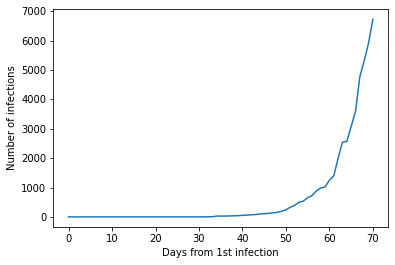

In [16]:
import matplotlib.pyplot as plt
plt.plot(list(range(0,counts_np.shape[0])),counts_np)
plt.xlabel("Days from 1st infection") 
plt.ylabel("Number of infections") 
plt.show()


## Formulate the data-set


In [17]:
x_days = np.array(list(range(0, len(counts_np))))
x_days

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
       51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
       68, 69, 70])

In [18]:
y_infections_india = counts_np
y_infections_india

array([   1,    1,    1,    2,    3,    3,    3,    3,    3,    3,    3,
          3,    3,    3,    3,    3,    3,    3,    3,    3,    3,    3,
          3,    3,    3,    3,    3,    3,    3,    3,    3,    3,    5,
          5,   28,   30,   31,   34,   39,   43,   56,   62,   73,   82,
        102,  113,  119,  142,  156,  194,  244,  330,  396,  499,  536,
        657,  727,  887,  987, 1024, 1251, 1397, 1998, 2543, 2567, 3082,
       3588, 4778, 5311, 5916, 6725])

## Obtaining data for any country

Note the changes, to add up all provinces/regions within a country, if found. For example, there are more than one regions in China.

In [0]:
def get_covidian_count(country_name):
  country_data = numbers_df[numbers_df["Country/Region"] == country_name]
  rows = country_data.shape[0]
  counts = country_data.iloc[0:rows, range(4, len(country_data.columns))]
  counts = counts.sum()
  startCol = 0
  for column in counts:
    if column > 0:
      break
    startCol = startCol + 1
  counts = counts.iloc[range(startCol, len(counts))]
  np_arr = np.squeeze(counts.to_numpy())
  x_days = np.array(list(range(0, len(np_arr))))
  return np.array([x_days, np_arr])



In [20]:
infections_usa = get_covidian_count("US")
infections_india = get_covidian_count("India")
infections_china = get_covidian_count("China")
infections_india

array([[   0,    1,    2,    3,    4,    5,    6,    7,    8,    9,   10,
          11,   12,   13,   14,   15,   16,   17,   18,   19,   20,   21,
          22,   23,   24,   25,   26,   27,   28,   29,   30,   31,   32,
          33,   34,   35,   36,   37,   38,   39,   40,   41,   42,   43,
          44,   45,   46,   47,   48,   49,   50,   51,   52,   53,   54,
          55,   56,   57,   58,   59,   60,   61,   62,   63,   64,   65,
          66,   67,   68,   69,   70],
       [   1,    1,    1,    2,    3,    3,    3,    3,    3,    3,    3,
           3,    3,    3,    3,    3,    3,    3,    3,    3,    3,    3,
           3,    3,    3,    3,    3,    3,    3,    3,    3,    3,    5,
           5,   28,   30,   31,   34,   39,   43,   56,   62,   73,   82,
         102,  113,  119,  142,  156,  194,  244,  330,  396,  499,  536,
         657,  727,  887,  987, 1024, 1251, 1397, 1998, 2543, 2567, 3082,
        3588, 4778, 5311, 5916, 6725]])

In [0]:
np.savetxt("usa.csv",  np.transpose([infections_usa[0],infections_usa[1]]), fmt="%d,%d", header="Days, Count")
np.savetxt("india.csv",  np.transpose([infections_india[0],infections_india[1]]), fmt="%d,%d", header="Days, Count")
np.savetxt("china.csv",  np.transpose([infections_china[0],infections_china[1]]), fmt="%d,%d", header="Days, Count")

To confirm the data is proper, load the data back and check.

In [22]:
test_np = np.loadtxt("usa.csv", delimiter=',', skiprows=1, dtype='int,int')
test_np

array([( 0,      1), ( 1,      1), ( 2,      2), ( 3,      2),
       ( 4,      5), ( 5,      5), ( 6,      5), ( 7,      5),
       ( 8,      5), ( 9,      7), (10,      8), (11,      8),
       (12,     11), (13,     11), (14,     11), (15,     11),
       (16,     11), (17,     11), (18,     11), (19,     11),
       (20,     12), (21,     12), (22,     13), (23,     13),
       (24,     13), (25,     13), (26,     13), (27,     13),
       (28,     13), (29,     13), (30,     15), (31,     15),
       (32,     15), (33,     51), (34,     51), (35,     57),
       (36,     58), (37,     60), (38,     68), (39,     74),
       (40,     98), (41,    118), (42,    149), (43,    217),
       (44,    262), (45,    402), (46,    518), (47,    583),
       (48,    959), (49,   1281), (50,   1663), (51,   2179),
       (52,   2727), (53,   3499), (54,   4632), (55,   6421),
       (56,   7783), (57,  13747), (58,  19273), (59,  25600),
       (60,  33276), (61,  43847), (62,  53740), (63,  

## Given x, predict y


#### References
1. https://pypi.org/project/fbprophet

2. https://machinelearningmastery.com/time-series-forecasting-methods-in-python-cheat-sheet/
